<a href="https://colab.research.google.com/github/Olya-Shulga/Univercity/blob/main/Tasks/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_GeoPandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [33]:
%%capture
!pip install geopandas leafmap folium matplotlib mapclassify
# Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [67]:
import numpy as np

matrix = np.array([
    [35.6895, 139.6917],   # Токио
    [40.7128, -74.0060],   # Нью-Йорк
    [51.5074, -0.1278],    # Лондон
    [48.8566, 2.3522]      # Париж
])


print(matrix)

[[ 35.6895 139.6917]
 [ 40.7128 -74.006 ]
 [ 51.5074  -0.1278]
 [ 48.8566   2.3522]]


2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [68]:
radians = np.radians(matrix)
radians

array([[ 0.6229,  2.4381],
       [ 0.7106, -1.2916],
       [ 0.899 , -0.0022],
       [ 0.8527,  0.0411]])



3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [69]:

print(f"Разница между Токио и Нью-Йорк в радианах: {radians[0] - radians[1]}")
print(f"Разница между Токио и Лондон в радианах: {radians[0] - radians[2]}")
print(f"Разница между Токио и Париж в радианах: {radians[0] - radians[3]}")


Разница между Токио и Нью-Йорк в радианах: [-0.0877  3.7297]
Разница между Токио и Лондон в радианах: [-0.2761  2.4403]
Разница между Токио и Париж в радианах: [-0.2298  2.397 ]


## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [70]:
import pandas as pd

df_loaded = pd.read_csv('world_cities.csv', encoding='utf-8')
df_loaded

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [71]:
strings_five = df_loaded[:5]
print(f"Первые 5 строк из файла world_cities.csv:\n\n {strings_five}")
print(f"\nПроверка на пропущенные значения:\n\n{strings_five.isnull()}")

Первые 5 строк из файла world_cities.csv:

    id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062

Проверка на пропущенные значения:

      id   name  country  latitude  longitude  population
0  False  False    False     False      False       False
1  False  False    False     False      False       False
2  False  False    False     False      False       False
3  False  False    False     False      False       False
4  False  False    False     False      False       False


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [72]:
large_cities = df_loaded[df_loaded['population'] > 1000000]

print(f"Крупные города (население > 1 млн.):\n\n {large_cities}")

Крупные города (население > 1 млн.):

         id            name country  latitude  longitude  population
97      98           Turin     ITA  45.07039    7.66996     1652000
103    104           Lille     FRA  50.64997    3.08001     1044000
123    124  San Bernardino     USA  34.12038 -117.30003     1745000
124    125      Bridgeport     USA  41.17998  -73.19996     1018000
126    127      Manchester     GBR  53.50042   -2.24799     2230000
...    ...             ...     ...       ...        ...         ...
1244  1245  Rio de Janeiro     BRA -22.92502  -43.22502    11748000
1245  1246       Sao Paulo     BRA -23.55868  -46.62502    18845000
1246  1247          Sydney     AUS -33.92001  151.18518     4630000
1247  1248       Singapore     SGP   1.29303  103.85582     5183700
1248  1249       Hong Kong     CHN  22.30498  114.18501     7206000

[392 rows x 6 columns]


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [73]:
population_by_country = df_loaded.groupby('country')['population'].sum()
population_by_country

,population
country,
AFG,4931702
AGO,6821544
ALB,895350
ALD,10682
AND,53998
...,...
WSM,61916
YEM,3759000
ZAF,13373789




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [74]:
sorted_cities = df_loaded.sort_values(by='population', ascending=False)
sorted_cities[:10]

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [75]:
import geopandas as gpd
from shapely.geometry import Point

df = gpd.read_file('nyc_buildings.geojson', encoding='utf-8')
df

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
...,...,...,...,...,...,...,...,...
1201,9764,26.54,22.30,24.42,696.24,36,New York,"POLYGON ((-73.97463 40.72411, -73.97467 40.724..."
1202,9765,10.44,16.53,13.48,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1203,9766,10.44,13.87,12.16,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1204,9774,13.76,NaN,13.76,1612.84,36,New York,"POLYGON ((-73.99154 40.71045, -73.99173 40.710..."


2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


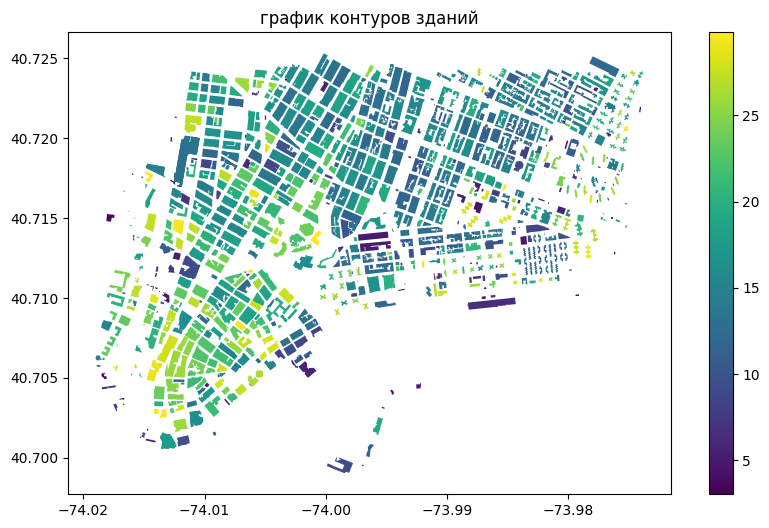

In [76]:
import matplotlib.pyplot as plt

df.plot(column='height_MS', legend=True, figsize=(10, 6))
plt.title('график контуров зданий')
plt.show()

3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [80]:
df.explore(
    column='height_MS',
    cmap='viridis',
    legend=True,
    tooltip=['height_MS', 'NAME'],
    popup=True,
    height=600
)


4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [48]:
mean_height = df['height_MS'].mean()
print(f"Средняя высота зданий: {mean_height} метров")

Средняя высота зданий: 15.454691136974038 метров


5. Выберите здания с высотой, превышающей среднюю высоту.


In [52]:
taller_than_mean = df[df['height_MS'] > mean_height]
print(f"Зданий выше среднего:\n\n{taller_than_mean}")

Зданий выше среднего:

       fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
1        4      23.62      46.18       34.90   3287.84      36  New York   
2        5      19.98     109.60       64.79   2011.21      36  New York   
3        9      18.50      18.18       18.34   3110.32      36  New York   
4       34      21.53      32.84       27.18   5240.89      36  New York   
5       38      18.84        NaN       18.84   1151.88      36  New York   
...    ...        ...        ...         ...       ...     ...       ...   
1196  9714      19.90      19.15       19.52   1230.57      36  New York   
1198  9752      19.35        NaN       19.35   4080.25      36  New York   
1199  9754      24.11      47.47       35.79   7137.13      36  New York   
1200  9756      16.20      15.17       15.68    166.41      36  New York   
1201  9764      26.54      22.30       24.42    696.24      36  New York   

                                               geometry  
1     




6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [55]:
taller_than_mean.to_file('taller_than_mean.geojson', driver='GeoJSON')

# проверка

result = gpd.read_file('taller_than_mean.geojson')
print("Здания с высотой, превышающей среднюю:\n\n")
result

Здания с высотой, превышающей среднюю:




,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
1,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
2,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
3,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
4,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
519,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
520,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
521,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
522,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."


## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [57]:
import pandas as pd

df_loaded = pd.read_csv('world_cities (1).csv', encoding='utf-8')
df_loaded

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [59]:
filtered_df = df_loaded[(df_loaded['latitude'] >= -40) & (df_loaded['latitude'] <= 60)]

filtered_df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [62]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['longitude'], filtered_df['latitude']),
    crs="EPSG:4326"
)

gdf

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [65]:
gdf_mercator = gdf.to_crs(crs="EPSG:3857")
gdf_mercator.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [66]:
paris_row = gdf_mercator[gdf_mercator['name'] == 'Paris']

gdf_mercator['distance_to_paris_m'] = gdf_mercator.geometry.distance(paris_row.geometry.iloc[0])

print(gdf_mercator[['name', 'country', 'distance_to_paris_m']])

                name country  distance_to_paris_m
0              Bombo     UGA         7.041672e+06
1        Fort Portal     UGA         6.916454e+06
2            Potenza     ITA         1.979335e+06
3         Campobasso     ITA         1.794231e+06
4              Aosta     ITA         7.561058e+05
...              ...     ...                  ...
1244  Rio de Janeiro     BRA         1.022204e+07
1245       Sao Paulo     BRA         1.048050e+07
1246          Sydney     AUS         1.949483e+07
1247       Singapore     SGP         1.284655e+07
1248       Hong Kong     CHN         1.299055e+07

[1132 rows x 3 columns]




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

In [79]:
gdf_mercator.explore(
    column='distance_to_paris_m',
    cmap='plasma',
    legend=True,
    legend_kwds={'caption': 'Расстояние до Парижа (м)'},
    tooltip=['name', 'country', 'distance_to_paris_m'],
    popup=True,
    height=600
)